# Analyzing Historical Stock/Revenue Data and Building a Dashboard

Breakdown:

Question 1 - Extracting Tesla Stock Data Using yfinance

Question 2 - Extracting Tesla Revenue Data Using Webscraping 

Question 3 - Extracting GameStop Stock Data Using yfinance

Question 4 - Extracting GameStop Revenue Data Using Webscraping

Question 5 - Tesla Stock and Revenue Dashboard

Question 6 - GameStop Stock and Revenue Dashboard

Question 7 - Sharing your Assignment Notebook


In [6]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define Graphing Function

In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [8]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Question 1: 
Use yfinance to Extract Stock Data using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [9]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

In [11]:
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [12]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data
Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. Save the text of the response as a variable named html_data.

In [32]:
import requests
# Step 1: Download HTML
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
html_data = response.text

In [33]:
soup = BeautifulSoup(html_data, "html.parser")

In [34]:
# Step 3: Find all tables
tables = soup.find_all("table")

In [35]:
# Step 4: Locate the Tesla revenue table
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_table_html = str(table)
        break

In [39]:

# Step 5: Read the table into a DataFrame
tesla_revenue = pd.read_html(tesla_table_html)[0]

# Step 6: Clean column names
tesla_revenue.columns = ["Date", "Revenue"]

# Step 7: Clean Revenue data
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace({r'\$': '', ',': ''}, regex=True)

# Step 8: Drop rows with missing values (optional)
tesla_revenue = tesla_revenue.dropna()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13864\48395605.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(tesla_table_html)[0]


In [40]:
tesla_revenue

,Date,Revenue
0,2025-03-31,19335
1,2024-12-31,25707
2,2024-09-30,25182
3,2024-06-30,25500
4,2024-03-31,21301
...,...,...
58,2010-09-30,31
59,2010-06-30,28
60,2010-03-31,21
62,2009-09-30,46


# Question 3 - Extracting GameStop Stock Data Using yfinance

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [41]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. 
Set the period parameter to max so we get information for the maximum amount of time.

In [42]:
gme_data=gamestop.history(period="max")

Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame
and display the first five rows of the gme_data dataframe using the head function. 
Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [43]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping 

Use the requests library to download the webpage https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue. Save the text of the response as a variable named html_data.

In [52]:
from io import StringIO

# Step 1: Download HTML
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
html_data = response.text 


In [55]:
# Step 2: Parse HTML
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find the table containing "GameStop Quarterly Revenue"
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gamestop_table_html = str(table)
        break

# Step 4: Read the table into DataFrame
gamestop_revenue = pd.read_html(StringIO(gamestop_table_html))[0]

# Step 5: Rename columns
gamestop_revenue.columns = ["Date", "Revenue"]

# Step 6: Clean Revenue column
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].replace({r'\$': '', ',': ''}, regex=True)
gamestop_revenue = gamestop_revenue.dropna()

# Step 7: Display
gamestop_revenue


,Date,Revenue
0,2025-04-30,732
1,2025-01-31,1283
2,2024-10-31,860
3,2024-07-31,798
4,2024-04-30,882
...,...,...
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981


# Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(tesla_data, tesla_revenue, 'Tesla')

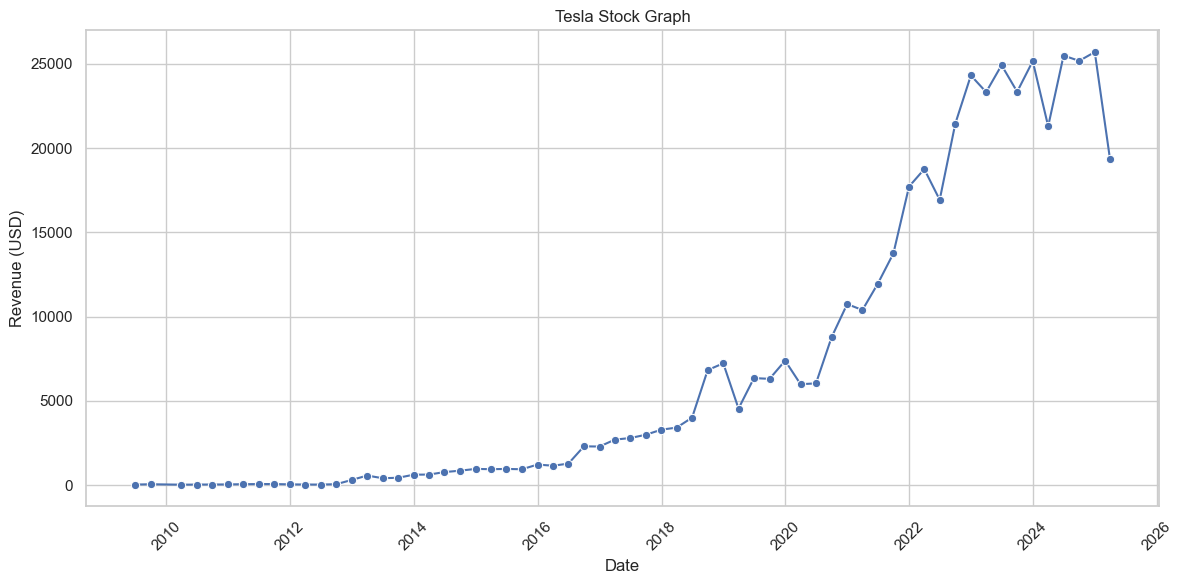

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert columns
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=tesla_revenue, x='Date', y='Revenue', marker='o')
plt.title('Tesla Stock Graph')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Question 6: Plot GameStop Stock Graph
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop').

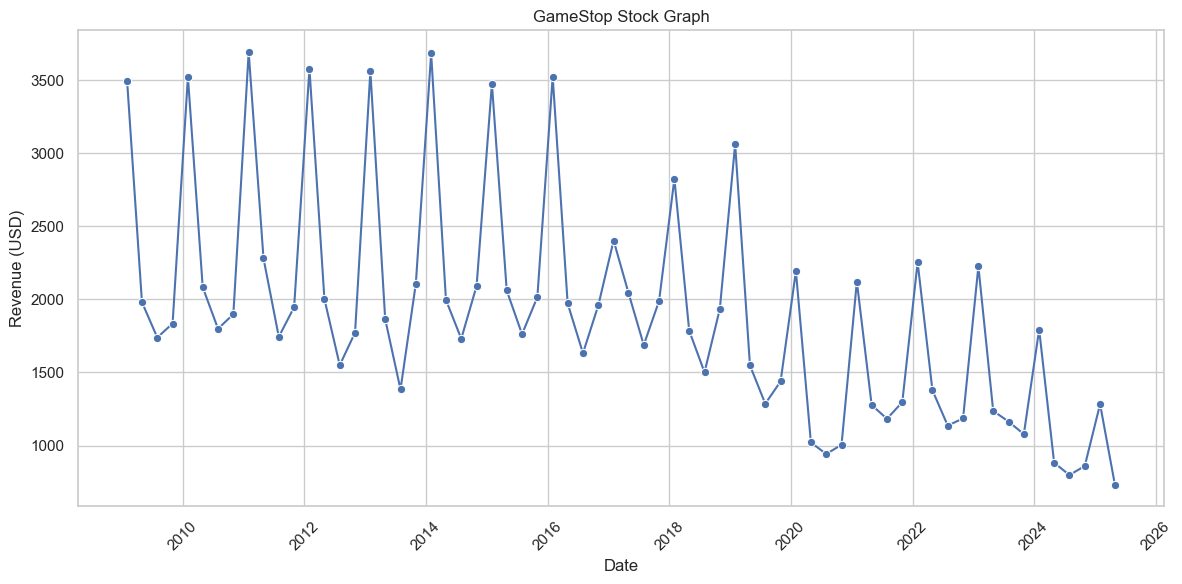

In [67]:
gamestop_revenue['Date'] = pd.to_datetime(gamestop_revenue['Date'])
gamestop_revenue['Revenue'] = pd.to_numeric(gamestop_revenue['Revenue'], errors='coerce')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=gamestop_revenue, x='Date', y='Revenue', marker='o')
plt.title('GameStop Stock Graph')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
